In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import random

In [5]:
# Critere de performance
def compute_pred_score(y_true, y_pred):
    y_pred_unq =  np.unique(y_pred)
    for i in y_pred_unq:
        if((i != -1) & (i!= 1) & (i!= 0) ):
            raise ValueError('The predictions can contain only -1, 1, or 0!')
    y_comp = y_true * y_pred
    score = float(10*np.sum(y_comp == -1) + np.sum(y_comp == 0))
    score /= y_comp.shape[0]
    return score

In [6]:
X_train_fname = '../data/training_templates.csv'
y_train_fname = '../data/training_labels.txt'
X_test_fname  = '../data/testing_templates.csv'
X_train = pd.read_csv(X_train_fname, sep=',', header=None).values
X_test  = pd.read_csv(X_test_fname,  sep=',', header=None).values
y_train = np.loadtxt(y_train_fname, dtype=np.int)

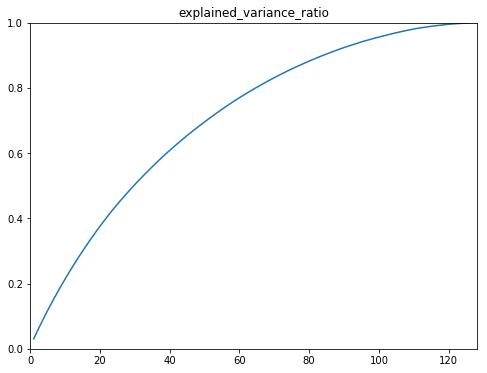

Done in 5.946s.


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

random.seed(0)

t0 = time()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(1, figsize=(8,6))
plt.title("explained_variance_ratio")
plt.plot(range(1, X_train_pca.shape[1]+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, X_train_pca.shape[1])
plt.ylim(0,1)
plt.show()
print "Done in %0.3fs." % (time()-t0)

In [ ]:
X_test_pca = pca.transform(X_test)